   year  temperature_2m  relative_humidity_2m  precipitation  \
0  2022            19.1                  76.0            0.0   
1  2022            19.1                  76.0            0.0   
2  2022            19.1                  76.0            0.0   
3  2022            19.1                  76.0            0.0   
4  2022            19.1                  76.0            0.0   

   surface_pressure  month country     subdivision     type  \
0             912.8    7.0  Brazil    Minas Gerais  Arabica   
1             912.8    7.0  Brazil  Espirito Santo  Arabica   
2             912.8    7.0  Brazil  Espirito Santo  Robusta   
3             912.8    7.0  Brazil       Sao Paulo  Arabica   
4             912.8    7.0  Brazil          Parana  Arabica   

   million_60kgs_bag  nonbear_mill_trees  bear_mill_trees  nonbear_thous_hect  \
0               24.5              1500.0           6010.0               470.0   
1                3.7              1500.0           6010.0               47

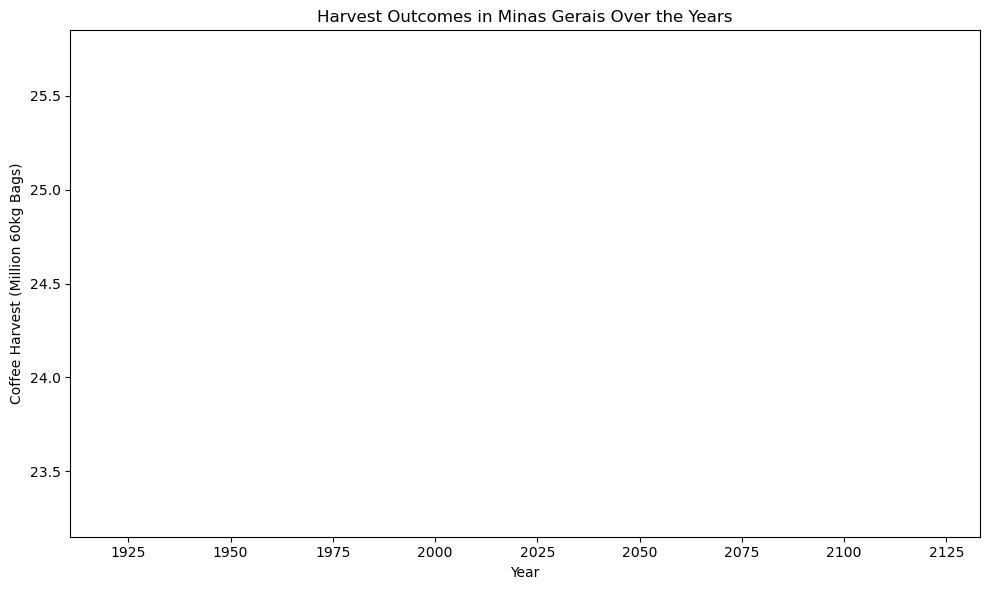

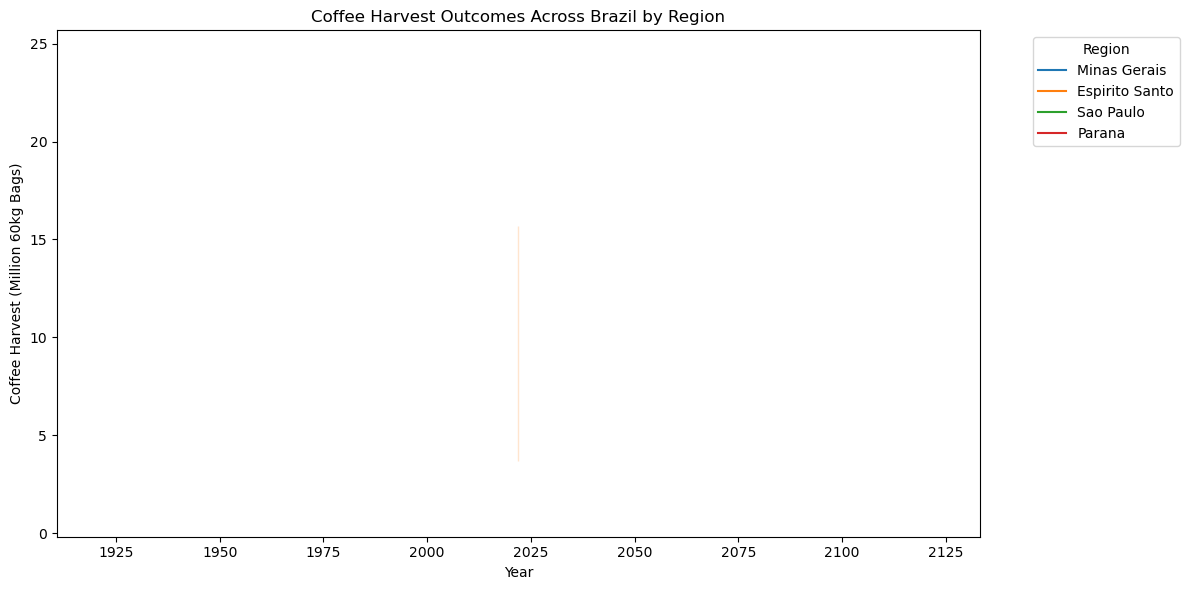

/var/folders/9c/8cq4r0q54tg0b2yf0877hlkr0000gn/T/ipykernel_93339/1146065835.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="subdivision", y="million_60kgs_bag", data=yearly_combined, estimator="sum", ci=None)


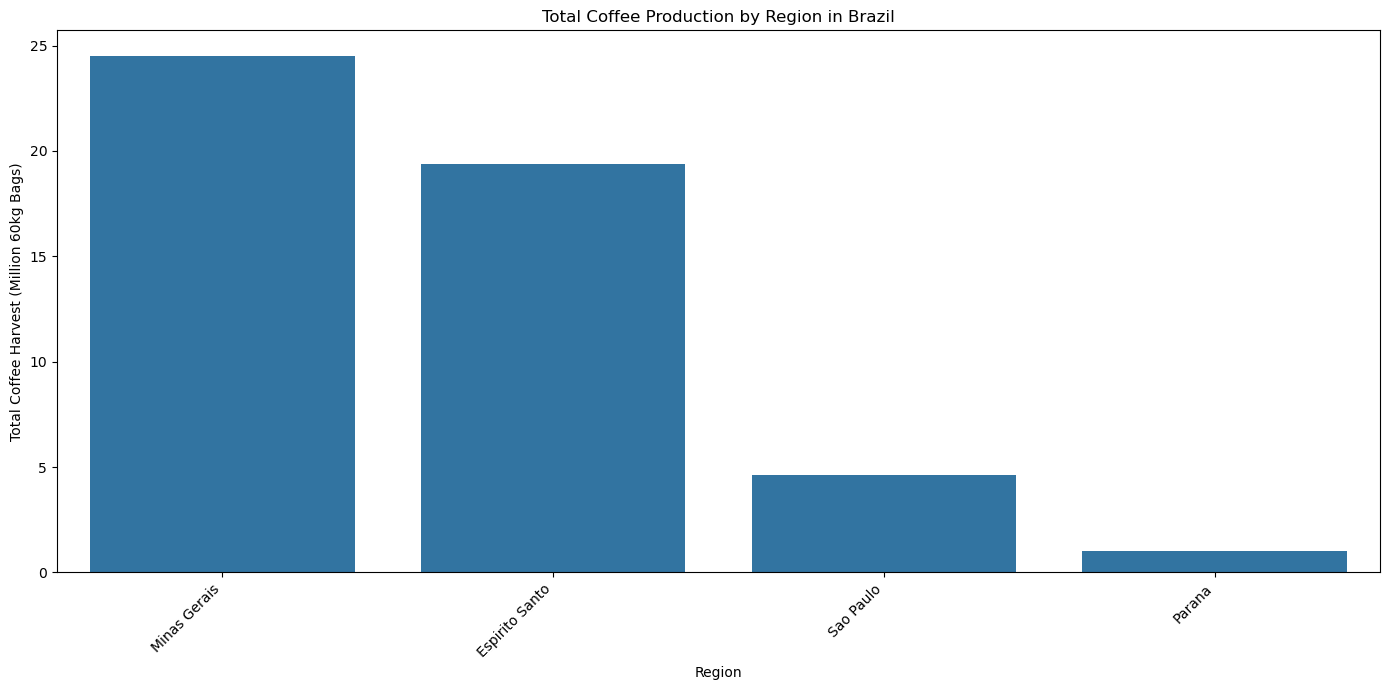

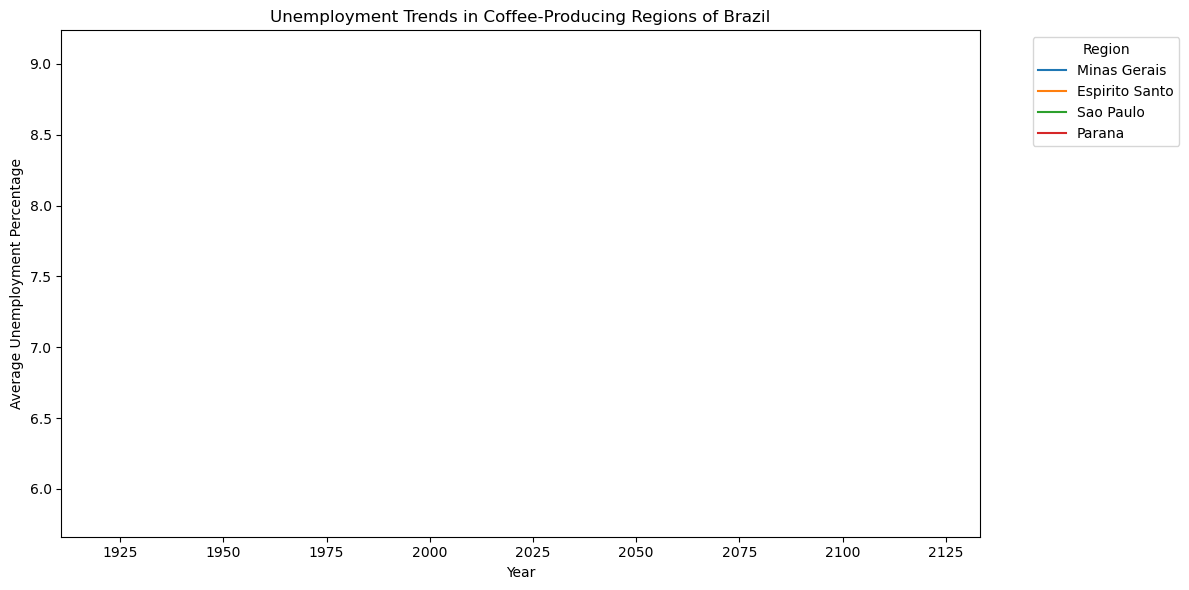

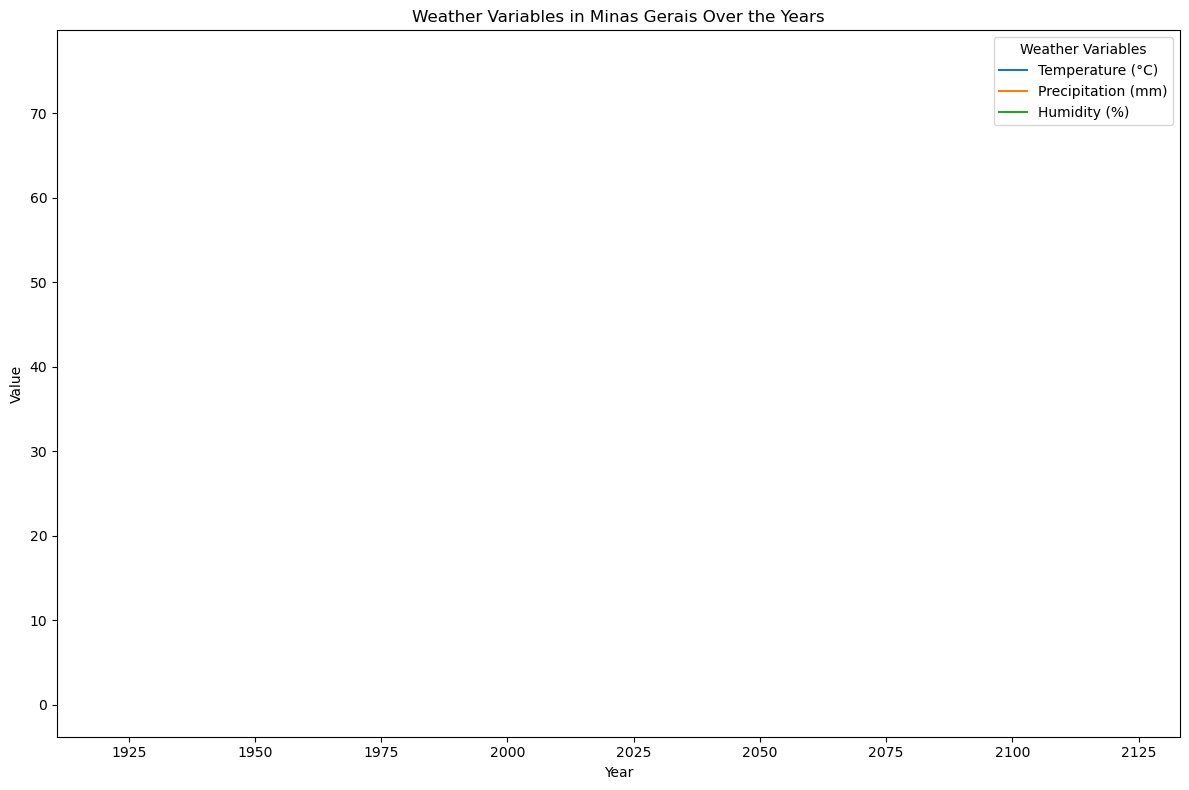

In [9]:
import pandas as pd

# Load the combined data (yearly medians of weather and harvest data)
yearly_combined = pd.read_csv('../data/CSV/yearly_combined.csv')

# Check for missing values and drop if needed
yearly_combined = yearly_combined.dropna()

# Display the first few rows to verify the columns
print(yearly_combined.head())

# Select only numeric columns
numeric_columns = yearly_combined.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix for numeric columns
correlation_matrix = yearly_combined[numeric_columns].corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Line plot to see the yearly harvest outcomes in Minas Gerais
plt.figure(figsize=(10, 6))
sns.lineplot(x="year", y="million_60kgs_bag", data=yearly_combined[yearly_combined['subdivision'] == 'Minas Gerais'])
plt.title("Harvest Outcomes in Minas Gerais Over the Years")
plt.xlabel("Year")
plt.ylabel("Coffee Harvest (Million 60kg Bags)")
plt.tight_layout()
plt.show()

# Line plot comparing harvest outcomes across different regions in Brazil
plt.figure(figsize=(12, 6))
sns.lineplot(x="year", y="million_60kgs_bag", hue="subdivision", data=yearly_combined)
plt.title("Coffee Harvest Outcomes Across Brazil by Region")
plt.xlabel("Year")
plt.ylabel("Coffee Harvest (Million 60kg Bags)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Bar plot showing total coffee harvest output by region and subcategory
plt.figure(figsize=(14, 7))
sns.barplot(x="subdivision", y="million_60kgs_bag", data=yearly_combined, estimator="sum", ci=None)
plt.title("Total Coffee Production by Region in Brazil")
plt.xlabel("Region")
plt.ylabel("Total Coffee Harvest (Million 60kg Bags)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Line plot to show unemployment trends in various regions of Brazil
plt.figure(figsize=(12, 6))
sns.lineplot(x="year", y="avg_unemp_perc", hue="subdivision", data=yearly_combined)
plt.title("Unemployment Trends in Coffee-Producing Regions of Brazil")
plt.xlabel("Year")
plt.ylabel("Average Unemployment Percentage")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Line plot for weather variables in Minas Gerais
plt.figure(figsize=(12, 8))
sns.lineplot(x="year", y="temperature_2m", data=yearly_combined[yearly_combined['subdivision'] == 'Minas Gerais'], label="Temperature (°C)")
sns.lineplot(x="year", y="precipitation", data=yearly_combined[yearly_combined['subdivision'] == 'Minas Gerais'], label="Precipitation (mm)")
sns.lineplot(x="year", y="relative_humidity_2m", data=yearly_combined[yearly_combined['subdivision'] == 'Minas Gerais'], label="Humidity (%)")
plt.title("Weather Variables in Minas Gerais Over the Years")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(title="Weather Variables")
plt.tight_layout()
plt.show()
